##**Importation des librairies**

In [ ]:
# Traitement et manipulation des données
import pandas as pd
import numpy as np

    # Visualisation
import seaborn as sns
import matplotlib.pyplot as plt

    # Modélisation
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier #notre modele
from sklearn.metrics import classification_report, confusion_matrix

##**Recupération et lecture du fichier .CSV**

In [ ]:
import pandas as pd

  #Lien direct de téléchargement
url = "https://drive.google.com/uc?export=download&id=1TzUbV-Ad0LlZ-oXvlRoT0gUPKtb0UP7X"

    # Charger les données
df = pd.read_csv(url, sep="\t")

**Aperçu des données**

In [ ]:
 # Aperçu des données"
pd.set_option('display.max_columns', None)
print(df.head())

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58       635         88              546              172   
1  08-03-2014       38        11          1                6                2   
2  21-08-2013       26       426         49              127              111   
3  10-02-2014       26        11          4               20               10   
4  19-01-2014       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsP

#** Types de données**

In [ ]:
# Types de données
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Il y a des données de types "object" qui ne sont pas compatibles à l'entrainement du modèle. Il faudra les "encoder" ultérieurement.

**Résumé statistique.**

In [ ]:
# Résumé statistique des colonnes numériques
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


##**Nettoyage des données**

**Identifier les valeurs manquantes**

In [ ]:
# Compte des valeurs manquantes
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


Nous avons identifier des valeurs manquantes dans la colonne "Income". Nous pouvons, à notre jugement, soit supprimer les colonnes contenant des valeurs vides, soit remplacer ces valeurs vides (par des moyennes par exemple).
Dans ce jeu de données contenant environ 2400 lignes, ça ne represente qu'1%, ce qui est négligeable.

In [ ]:

# si je veux remplacer les éléments vides par la moyenne:

      #moyenne_income = df['Income'].mean()
      #df['Income'] = df['Income'].fillna(moyenne_income)

# pour supprimer les lignes n'ayant pas de données dans la colonne "Income":

df = df.dropna(subset=['Income'])


Les espaces peuvent porter à confusion et déclencher des conflits pendant notre traitement.

In [ ]:
# Enlever les espaces des colonnes et mettre toutes les données en minuscules:

df.columns = df.columns.str.lower().str.strip()
  # ou
 #for x in df.columns:
    #df.rename(columns={x: x.lower().strip()}, inplace=True)

df.columns

Index(['id', 'year_birth', 'education', 'marital_status', 'income', 'kidhome',
       'teenhome', 'dt_customer', 'recency', 'mntwines', 'mntfruits',
       'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts',
       'mntgoldprods', 'numdealspurchases', 'numwebpurchases',
       'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth',
       'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1',
       'acceptedcmp2', 'complain', 'z_costcontact', 'z_revenue', 'response'],
      dtype='object')

Les doublons sont aussi des éléments pouvant fausser l'analyse. Il n y en a pas dans ce jeu de données.

In [ ]:
#identifier les doublons:

doublons = df.duplicated()
print(doublons.sum())
    #si doublons, utiliser la fonction df.drop_duplicates()

0


J'identifie (pré-traitement) des colonnes qui ne m'intéresse pas. Ici la colonne 'ID' (les valeurs de celle-ci ne sont pas pertinentes).

**Suppression de colonne**

In [ ]:
# supprimer la colonne 'ID'
if 'ID' in df.columns:
  df = df.drop('ID', axis=1)
df.head()

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


**Identification de valeurs dans une colonne**

In [ ]:
# J'identifie les valeurs contenues dans la colonne 'Marital_Status', elles sont catégorielles:

valeurs_uniques = df['marital_status'].unique()
print(valeurs_uniques)


['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


De cette facon, je peux identifier des valeurs aberrentes comme 'Absurd' et 'YOLO'

In [ ]:
comptage_valeurs = df['marital_status'].value_counts()
print(comptage_valeurs)


marital_status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64


Les lignes cdontenant 'Absurd' et 'YOLO' ne représentent pas un échantillon important du dataset. Je peux décider de supprimer les lignes.

In [ ]:
# Supprimer toutes les occurrences de 'Absurd' et 'Yolo'dans la colonne 'Marital_Status':

df = df[df['marital_status'] != 'Absurd'] # Supprime toutes les lignes où la valeur de la colonne Marital_Status est égale à 'Absurd'
df = df[df['marital_status'] != 'YOLO'] # Même chose pour 'YOLO'


print(df['marital_status'].value_counts())


marital_status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Name: count, dtype: int64


# **VALEURS ABERRENTES**

graphique pour détecter les valeurs aberrentes

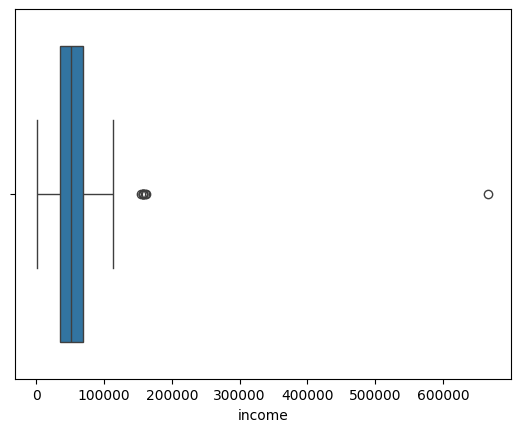

In [ ]:

# Boxplot
sns.boxplot(x=df['income'])
plt.show()


Nous observons des valeurs sortant de la plage d'acceptation. Elles sont considérées comme anormales.

In [ ]:
# Calcul des limites avec l'IQR (Interquartile Range)
Q1 = df['income'].quantile(0.25)
Q3 = df['income'].quantile(0.75)
IQR = Q3 - Q1

# Définir les limites
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Repérer les valeurs aberrantes
outliers = df[(df['income'] < lower_bound) | (df['income'] > upper_bound)]

# Supprimer les outliers
df = df[(df['income'] >= lower_bound) & (df['income'] <= upper_bound)]


Nous avons supprimé les outliers de la colonne 'Income'

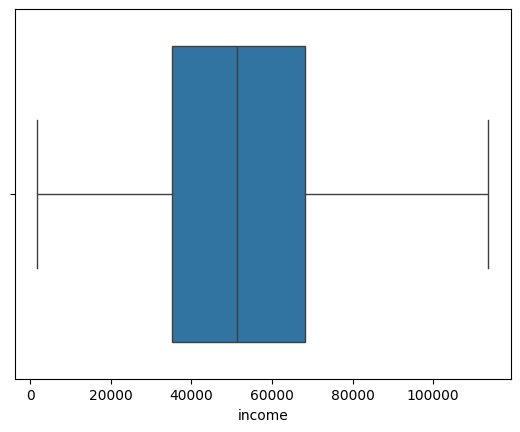

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot
sns.boxplot(x=df['income'])
plt.show()


comme on peut le voir sur le graphique, les valeurs aberrentes ont été supprimées.

**##Standardisation**

# Convertir les dates en format standard



In [ ]:
df['dt_customer'] = pd.to_datetime(df['dt_customer'], format='%d-%m-%Y', errors='coerce')
print(df['dt_customer'].head())

0   2012-09-04
1   2014-03-08
2   2013-08-21
3   2014-02-10
4   2014-01-19
Name: dt_customer, dtype: datetime64[ns]


Les dates de la colonne 'Dt_Customer' sont à présent en AAAA-MM-JJ, acceptés par Pandas.

**Uniformisation des données **

A titre d'exemple, probablement utile pour d'autres dataset



In [ ]:
### Remplacer les valeurs incohérentes:

#df['colonne_catégorique'] = df['colonne_catégorique'].replace({
    #'homme': 'Homme',
    #'HOMME': 'Homme',
    #'Femme': 'Femme'
#})

### Séparer une colonne 'Nom_Prenom' en 'Nom' et 'Prenom':

#df[['Nom', 'Prenom']] = df['Nom_Prenom'].str.split('_', expand=True)

#### Fusionner deux colonnes en une seule
#df['Nom_Complet'] = df['Nom'] + ' ' + df['Prenom']


**Exportation des données nettoyées**

In [ ]:
# Sauvegarder les données nettoyées, enregistrement directement sur l'environnement de travail
df.to_csv('data_cleaned.csv', index=False)


Encodage des données de **catégories**
en booléen, des nouvelles colonnes sont crées

In [ ]:

# Liste des colonnes à encoder
categorical_columns = ['education', 'marital_status']

# Appliquer le one-hot encoding et ajouter les colonnes au DataFrame
df_categories_encoded = pd.get_dummies(df, columns=categorical_columns, prefix=categorical_columns)

# Afficher le résultat
df_categories_encoded


,id,year_birth,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,marital_status_Alone,marital_status_Divorced,marital_status_Married,marital_status_Single,marital_status_Together,marital_status_Widow
0,5524,1957,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,False,False,True,False,False,False,False,False,True,False,False
1,2174,1954,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,False,False,True,False,False,False,False,False,True,False,False
2,4141,1965,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,False,False,True,False,False,False,False,False,False,True,False
3,6182,1984,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,False,False,True,False,False,False,False,False,False,True,False
4,5324,1981,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,False,False,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,False,False,True,False,False,False,False,True,False,False,False
2236,4001,1946,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,False,False,False,False,True,False,False,False,False,True,False
2237,7270,1981,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,False,False,True,False,False,False,True,False,False,False,False
2238,8235,1956,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,False,False,False,True,False,False,False,False,False,True,False


**distribution des valeurs d'une colonne**

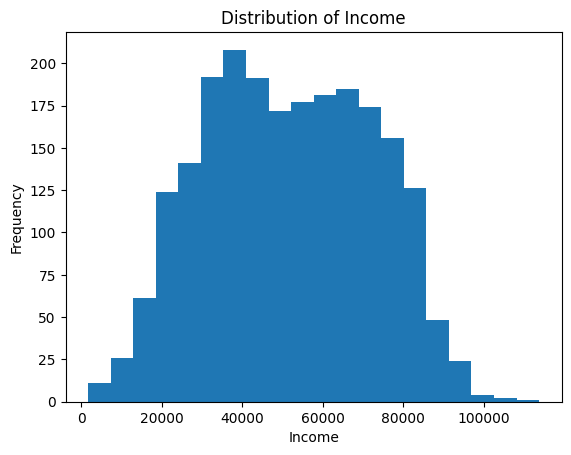

In [ ]:
plt.hist(df['income'], bins=20)
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Distribution of Income')
plt.show()

In [ ]:
print(df.isnull().sum())  # vérifier si on compte des NaN

id                     0
year_birth             0
education              0
marital_status         0
income                 0
kidhome                0
teenhome               0
dt_customer            0
recency                0
mntwines               0
mntfruits              0
mntmeatproducts        0
mntfishproducts        0
mntsweetproducts       0
mntgoldprods           0
numdealspurchases      0
numwebpurchases        0
numcatalogpurchases    0
numstorepurchases      0
numwebvisitsmonth      0
acceptedcmp3           0
acceptedcmp4           0
acceptedcmp5           0
acceptedcmp1           0
acceptedcmp2           0
complain               0
z_costcontact          0
z_revenue              0
response               0
dtype: int64


In [ ]:

df['marital_status'] = df['marital_status'].replace('Married', 'Together')
df['marital_status'] = df['marital_status'].replace('Divorced', 'Alone')
df['marital_status'] = df['marital_status'].replace('Widow', 'Alone')
df['marital_status'] = df['marital_status'].replace('Single', 'Alone')
print(df['marital_status'].value_counts())

marital_status
Together    1423
Alone        781
Name: count, dtype: int64


**Standardisation des données**

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Exemple de DataFrame avec les colonnes nécessaires


# Sélection des colonnes numériques
numerical_cols = ['income', 'kidhome', 'teenhome', 'recency', 'mntwines', 'mntfruits',
                  'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts', 'mntgoldprods',
                  'numdealspurchases', 'numwebpurchases', 'numcatalogpurchases', 'numstorepurchases',
                  'numwebvisitsmonth', 'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1',
                  'acceptedcmp2', 'z_costcontact', 'z_revenue','response']

# Sélection des colonnes catégoriques
categorical_cols = ['dt_customer', 'complain', 'education', 'marital_status']

# Sélectionner les colonnes numériques pour la standardisation
X = df[numerical_cols]

# Créer un objet StandardScaler
scaler = StandardScaler()

# Appliquer la standardisation
X_scaled = scaler.fit_transform(X)

# Convertir les données standardisées en DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=numerical_cols)

# Concaténer les colonnes standardisées avec les variables catégoriques
df_standardized = pd.concat([X_scaled_df, df[categorical_cols]], axis=1)

# Vérification du résultat
df_standardized.head()


income                        float64
kidhome                       float64
teenhome                      float64
recency                       float64
mntwines                      float64
mntfruits                     float64
mntmeatproducts               float64
mntfishproducts               float64
mntsweetproducts              float64
mntgoldprods                  float64
numdealspurchases             float64
numwebpurchases               float64
numcatalogpurchases           float64
numstorepurchases             float64
numwebvisitsmonth             float64
acceptedcmp3                  float64
acceptedcmp4                  float64
acceptedcmp5                  float64
acceptedcmp1                  float64
acceptedcmp2                  float64
z_costcontact                 float64
z_revenue                     float64
response                      float64
dt_customer            datetime64[ns]
complain                      float64
education                      object
marital_stat

**Matrice des corrélations**
Importante pour déterminer les colonnes pertinentes pour l'entrainement du modèle.

In [ ]:
# Check if 'Z_Revenue ' column exists before dropping it
if 'z_revenue' in df_standardized.columns:
	df_standardized = df_standardized.drop('z_revenue', axis=1)
else:
    print("Column 'Z_Revenue ' does not exist")
if 'z_costcontact' in df_standardized.columns:
    df_standardized = df_standardized.drop('z_costcontact', axis=1)
else:
    print("Column 'Z_CostContact' does not exist")
if 'id' in df_standardized.columns:
    df_standardized = df_standardized.drop('id', axis=1)
else:
    print("Column 'ID' does not exist")
print(df_standardized.dtypes)

Column 'ID' does not exist
income                        float64
kidhome                       float64
teenhome                      float64
recency                       float64
mntwines                      float64
mntfruits                     float64
mntmeatproducts               float64
mntfishproducts               float64
mntsweetproducts              float64
mntgoldprods                  float64
numdealspurchases             float64
numwebpurchases               float64
numcatalogpurchases           float64
numstorepurchases             float64
numwebvisitsmonth             float64
acceptedcmp3                  float64
acceptedcmp4                  float64
acceptedcmp5                  float64
acceptedcmp1                  float64
acceptedcmp2                  float64
response                      float64
dt_customer            datetime64[ns]
complain                      float64
education                      object
marital_status                 object
dtype: object


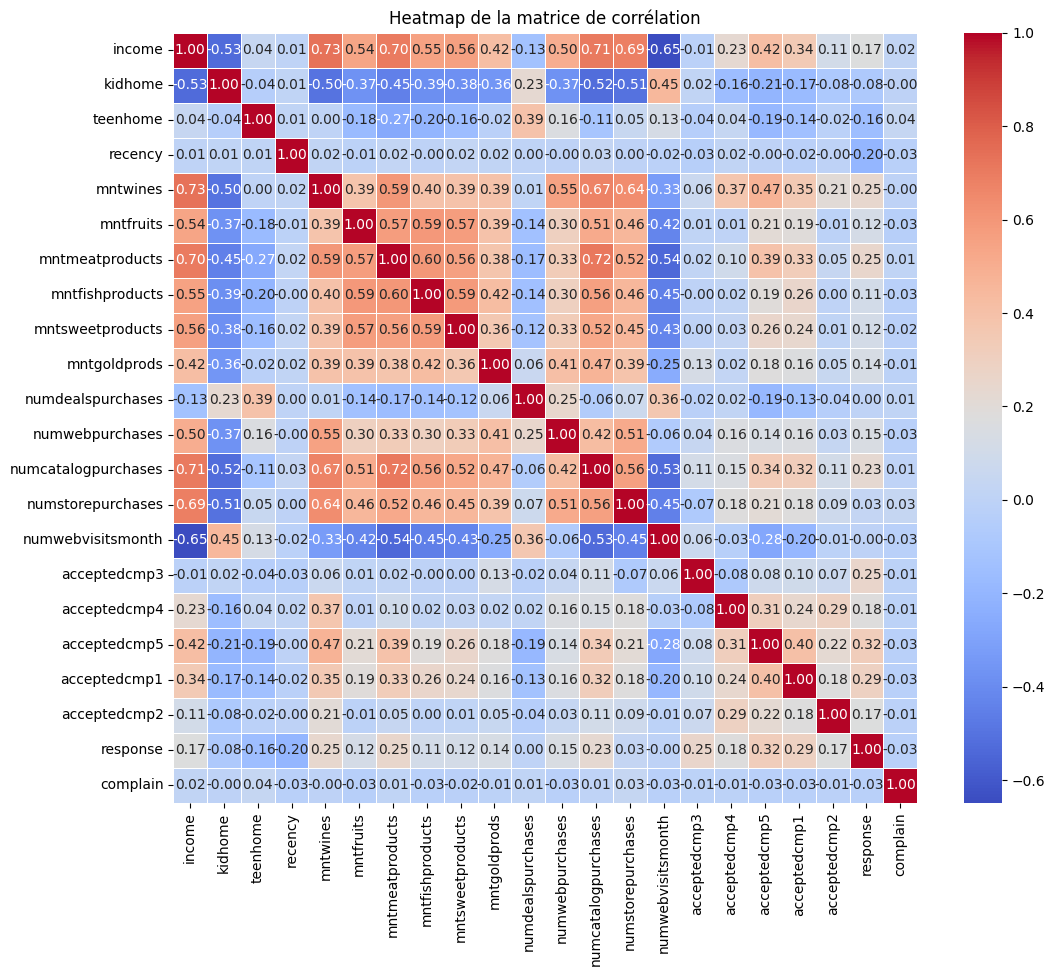

income                        float64
kidhome                       float64
teenhome                      float64
recency                       float64
mntwines                      float64
mntfruits                     float64
mntmeatproducts               float64
mntfishproducts               float64
mntsweetproducts              float64
mntgoldprods                  float64
numdealspurchases             float64
numwebpurchases               float64
numcatalogpurchases           float64
numstorepurchases             float64
numwebvisitsmonth             float64
acceptedcmp3                  float64
acceptedcmp4                  float64
acceptedcmp5                  float64
acceptedcmp1                  float64
acceptedcmp2                  float64
response                      float64
dt_customer            datetime64[ns]
complain                      float64
education                      object
marital_status                 object
dtype: object


In [ ]:
data_heatmap = pd.DataFrame(df_standardized)  # Convert the dictionary to DataFrame

# selectionner les dtypes dans la DataFrame
numeric_columns = data_heatmap.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = data_heatmap[numeric_columns].corr()

#  Visualiser avec seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap de la matrice de corrélation')
plt.show()


La corrélation est une mesure qui permet de savoir si deux variables ont une relation entre elles, et comment elles évoluent ensemble. Pour l'expliquer simplement :

**Si deux variables montent ou descendent ensemble, elles sont corrélées positivement.**
Exemple : Plus les gens achètent de la glace, plus les ventes de lunettes de soleil augmentent.

**Si une variable monte pendant que l'autre descend, elles sont corrélées négativement.**
Exemple : Plus il fait froid, moins on vend de crème glacée.

Si les deux variables n'ont aucun lien, il n'y a pas de corrélation.
Exemple : Le nombre de chats dans un pays et la consommation de jus d'orange.

Mesure de la corrélation :
On utilise souvent le coefficient de corrélation de Pearson (valeur entre -1 et 1).

1 = corrélation positive parfaite (les deux montent ensemble).

0 = pas de corrélation (aucune relation).

-1 = corrélation négative parfaite (l'une monte, l'autre descend).

Corrélation ≠ Causalité
Ce n'est pas parce que deux variables sont corrélées qu'une cause l'autre.
Exemple :

On remarque que quand la consommation de chocolat augmente, le nombre de prix Nobel augmente aussi.

Ces deux choses sont corrélées, mais elles n'ont aucun lien direct (il peut y avoir une autre raison, comme un niveau de richesse élevé dans certains pays qui influence les deux).

Astuce : Chercher des preuves ou des explications logiques pour dire qu'une variable cause l'autre.




In [ ]:
print(df_standardized.dtypes)

income                        float64
kidhome                       float64
teenhome                      float64
recency                       float64
mntwines                      float64
mntfruits                     float64
mntmeatproducts               float64
mntfishproducts               float64
mntsweetproducts              float64
mntgoldprods                  float64
numdealspurchases             float64
numwebpurchases               float64
numcatalogpurchases           float64
numstorepurchases             float64
numwebvisitsmonth             float64
acceptedcmp3                  float64
acceptedcmp4                  float64
acceptedcmp5                  float64
acceptedcmp1                  float64
acceptedcmp2                  float64
response                      float64
dt_customer            datetime64[ns]
complain                      float64
education                      object
marital_status                 object
dtype: object


In [ ]:

# déjà fait dans le nettoyage
# Conversion en datetime:

#df_standardized["Dt_Customer"] = pd.to_datetime(df_standardized["Dt_Customer"], format="%d-%m-%Y")

# Extraire l'année et le mois (ou tout autre paramètre pertinent):

df_standardized["year_customer"] = df_standardized["dt_customer"].dt.year
df_standardized["month_customer"] = df_standardized["dt_customer"].dt.month

# Option : Nombre de jours écoulés depuis une date de référence:

df_standardized["days_since_customer"] = (pd.to_datetime("2024-01-01") - df_standardized["dt_customer"]).dt.days



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Séparer les caractéristiques et la cible

X = df_standardized.drop(columns=["response", "dt_customer"])  # Supprimer aussi Dt_Customer transformé
y = df_standardized["response"]

# Handle missing values in the target variable (y) using SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')  # Remplace les NaN par des valeurs les plus fréquentes
y_imputed = imputer.fit_transform(y.values.reshape(-1, 1))  # Redimmensionnement pour SimpleImputer et compatibilité
y_imputed = y_imputed.astype(int)

y = y_imputed.ravel()

# Diviser en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Liste des colonnes numériques à standardiser
num_cols = ["income", "kidhome", "teenhome", "recency", "mntwines", "mntfruits",
            "mntmeatproducts", "mntfishproducts", "mntsweetproducts", "mntgoldprods",
            "year_customer", "month_customer", "days_since_customer"]


scaler = StandardScaler()
df_standardized[num_cols] = scaler.fit_transform(df_standardized[num_cols])


**Entrainement du modèle**

In [ ]:


# One-Hot Encoding sur X_train et X_test
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# Aligner les colonnes si nécessaire
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)



In [ ]:
print(X_train.dtypes)



income                     float64
kidhome                    float64
teenhome                   float64
recency                    float64
mntwines                   float64
mntfruits                  float64
mntmeatproducts            float64
mntfishproducts            float64
mntsweetproducts           float64
mntgoldprods               float64
numdealspurchases          float64
numwebpurchases            float64
numcatalogpurchases        float64
numstorepurchases          float64
numwebvisitsmonth          float64
acceptedcmp3               float64
acceptedcmp4               float64
acceptedcmp5               float64
acceptedcmp1               float64
acceptedcmp2               float64
complain                   float64
year_customer              float64
month_customer             float64
days_since_customer        float64
education_2n Cycle            bool
education_Basic               bool
education_Graduation          bool
education_Master              bool
education_PhD       

In [ ]:
print(X_train.dtypes)

income                     float64
kidhome                    float64
teenhome                   float64
recency                    float64
mntwines                   float64
mntfruits                  float64
mntmeatproducts            float64
mntfishproducts            float64
mntsweetproducts           float64
mntgoldprods               float64
numdealspurchases          float64
numwebpurchases            float64
numcatalogpurchases        float64
numstorepurchases          float64
numwebvisitsmonth          float64
acceptedcmp3               float64
acceptedcmp4               float64
acceptedcmp5               float64
acceptedcmp1               float64
acceptedcmp2               float64
complain                   float64
year_customer              float64
month_customer             float64
days_since_customer        float64
education_2n Cycle            bool
education_Basic               bool
education_Graduation          bool
education_Master              bool
education_PhD       

In [ ]:
# S'assurer que les colonnes correspondent entre X_train et X_test
#One-Hot Encoding, il peut arriver que X_train et X_test aient des colonnes différentes. Harmonisez-les comme suit :
X_train, X_test = X_train.align(X_test, join="left", axis=1)
X_test = X_test.fillna(0)  # Remplace les colonnes manquantes par 0


In [ ]:
model = RandomForestClassifier(random_state=11)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report
print("Accuracy :", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy : 0.8928571428571429
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       388
           1       0.73      0.32      0.44        60

    accuracy                           0.89       448
   macro avg       0.82      0.65      0.69       448
weighted avg       0.88      0.89      0.87       448

id                       int64
year_birth               int64
income                 float64
kidhome                  int64
teenhome                 int64
recency                  int64
mntwines                 int64
mntfruits                int64
mntmeatproducts          int64
mntfishproducts          int64
mntsweetproducts         int64
mntgoldprods             int64
numdealspurchases        int64
numwebpurchases          int64
numcatalogpurchases      int64
numstorepurchases        int64
numwebvisitsmonth        int64
acceptedcmp3             int64
acceptedcmp4             int64
acceptedcmp5             int64
acceptedcmp1           

In [ ]:
import numpy as np
print("Valeurs uniques dans y_train :", np.unique(y_train))
print("Valeurs uniques dans y_test :", np.unique(y_test))



Valeurs uniques dans y_train : [0 2]
Valeurs uniques dans y_test : [0 2]


In [ ]:
import numpy as np
# Normaliser les classes en 0 et 1
y_train = np.where(y_train == 2, 1, y_train) #If y_train value is 2, replace with 1, else keep original value.
y_test = np.where(y_test == 2, 1, y_test) #If y_test value is 2, replace with 1, else keep original value.

# Vérifier les valeurs uniques après normalisation
print("Valeurs uniques dans y_train :", np.unique(y_train))
print("Valeurs uniques dans y_test :", np.unique(y_test))




Valeurs uniques dans y_train : [0 1]
Valeurs uniques dans y_test : [0 1]


#RandomForestClassifier

##entrainnement

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import pandas as pd
import numpy as np

# Préparation des données
df_standardized = df.select_dtypes(include=[np.number])
X = df_standardized.drop('response', axis=1)
Y = df_standardized['response']

# Bin the continuous target variable into discrete categories
#Y_binned = pd.cut(Y, bins=2, labels=[0, 1])

# Séparer les données en jeu d'entraînement et de test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=11)

# Initialiser et entraîner le modèle de forêt aléatoire
rf_model = RandomForestClassifier(n_estimators=100, random_state=50)
rf_model.fit(X_train, Y_train)

RandomForestClassifier(random_state=50)

##prediction

In [ ]:
# Faire des prédictions
y_pred_rf = rf_model.predict(X_test)

# Évaluer les performances
accuracy_rf = accuracy_score(Y_test, y_pred_rf)
precision_rf = precision_score(Y_test, y_pred_rf, average='weighted')  # Weighted pour classes déséquilibrées
recall_rf = recall_score(Y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(Y_test, y_pred_rf, average='weighted')


##visualisation

In [ ]:
# Afficher les résultats
print(f'Accuracy: {accuracy_rf}')
print(f'Precision: {precision_rf}')
print(f'Recall: {recall_rf}')
print(f'F1-Score: {f1_rf}')

# Matrice de confusion
conf_matrix_rf = confusion_matrix(Y_test, y_pred_rf)
print('Confusion Matrix:\n', conf_matrix_rf)

# Rapport de classification détaillé
print('Classification Report:\n', classification_report(Y_test, y_pred_rf))


Accuracy: 0.8843537414965986
Precision: 0.8871285550453639
Recall: 0.8843537414965986
F1-Score: 0.857924809523148
Confusion Matrix:
 [[370   2]
 [ 49  20]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.99      0.94       372
           2       0.91      0.29      0.44        69

    accuracy                           0.88       441
   macro avg       0.90      0.64      0.69       441
weighted avg       0.89      0.88      0.86       441



##confusion

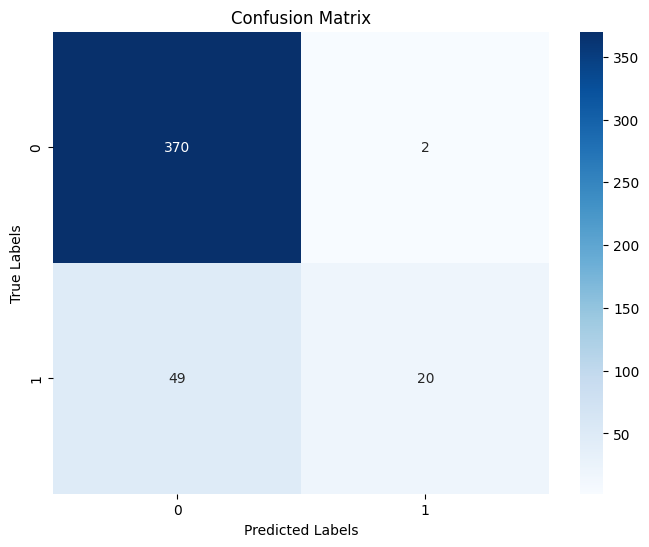

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


##feature importance

                Feature  Importance
5               recency    0.095242
2                income    0.084746
6              mntwines    0.083386
8       mntmeatproducts    0.072812
0                    id    0.071780
11         mntgoldprods    0.056918
1            year_birth    0.054655
10     mntsweetproducts    0.050102
16    numwebvisitsmonth    0.048093
7             mntfruits    0.046610
9       mntfishproducts    0.045258
15    numstorepurchases    0.041593
19         acceptedcmp5    0.040799
14  numcatalogpurchases    0.039326
17         acceptedcmp3    0.035979
12    numdealspurchases    0.035674
13      numwebpurchases    0.032695
20         acceptedcmp1    0.027987
4              teenhome    0.012217
21         acceptedcmp2    0.009078
3               kidhome    0.007767
18         acceptedcmp4    0.006810
22             complain    0.000474
23        z_costcontact    0.000000
24            z_revenue    0.000000


<ipython-input-304-ccfd8f57f20a>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'], palette='viridis')


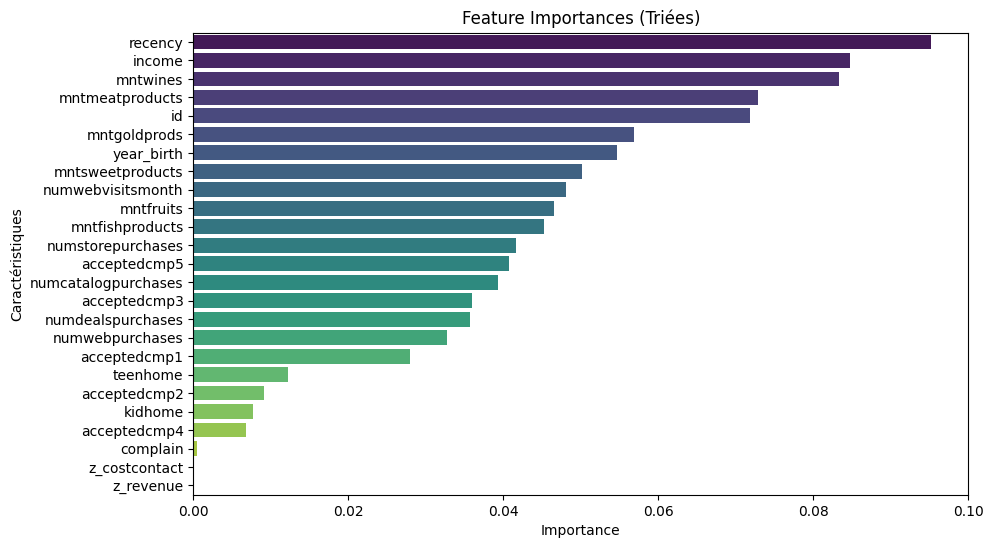

In [ ]:
# Importance des caractéristiques
importances = rf_model.feature_importances_
features = X.columns

# Créer un DataFrame pour lier les caractéristiques à leur importance
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})

# Trier par importance décroissante
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Afficher les caractéristiques triées
print(feature_importance_df)

# Visualiser avec un graphique
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'], palette='viridis')
plt.title('Feature Importances (Triées)')
plt.xlabel('Importance')
plt.ylabel('Caractéristiques')
plt.show()


#KNN

##entrainnement

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import pandas as pd
import numpy as np

# Préparation des données
df_numerique = df.select_dtypes(include=[np.number])
X = df_numerique.drop('response', axis=1)
Y = df_numerique['response']

# Bin the continuous target variable into discrete categories
#Y_binned = pd.cut(Y, bins=2, labels=[0, 1])

# Séparer les données en jeu d'entraînement et de test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_binned, test_size=0.2, random_state=11)

# Initialiser et entraîner le modèle KNN
knn_model = KNeighborsClassifier(n_neighbors=5)  # Vous pouvez ajuster n_neighbors
knn_model.fit(X_train, Y_train)

KNeighborsClassifier()

##prediction

In [ ]:

# Faire des prédictions
y_pred_knn = knn_model.predict(X_test)

# Évaluer les performances
accuracy_knn = accuracy_score(Y_test, y_pred_knn)
precision_knn = precision_score(Y_test, y_pred_knn, average='weighted')  # Weighted pour classes déséquilibrées
recall_knn = recall_score(Y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(Y_test, y_pred_knn, average='weighted')


##visualisation

In [ ]:

# Afficher les résultats
print(f'Accuracy (KNN): {accuracy_knn}')
print(f'Precision (KNN): {precision_knn}')
print(f'Recall (KNN): {recall_knn}')
print(f'F1-Score (KNN): {f1_knn}')

# Matrice de confusion
conf_matrix_knn = confusion_matrix(Y_test, y_pred_knn)
print('Confusion Matrix (KNN):\n', conf_matrix_knn)

# Rapport de classification détaillé
print('Classification Report (KNN):\n', classification_report(Y_test, y_pred_knn))


Accuracy (KNN): 0.8253968253968254
Precision (KNN): 0.759371833839919
Recall (KNN): 0.8253968253968254
F1-Score (KNN): 0.7798205120261074
Confusion Matrix (KNN):
 [[359  13]
 [ 64   5]]
Classification Report (KNN):
               precision    recall  f1-score   support

           0       0.85      0.97      0.90       372
           1       0.28      0.07      0.11        69

    accuracy                           0.83       441
   macro avg       0.56      0.52      0.51       441
weighted avg       0.76      0.83      0.78       441



##confusion

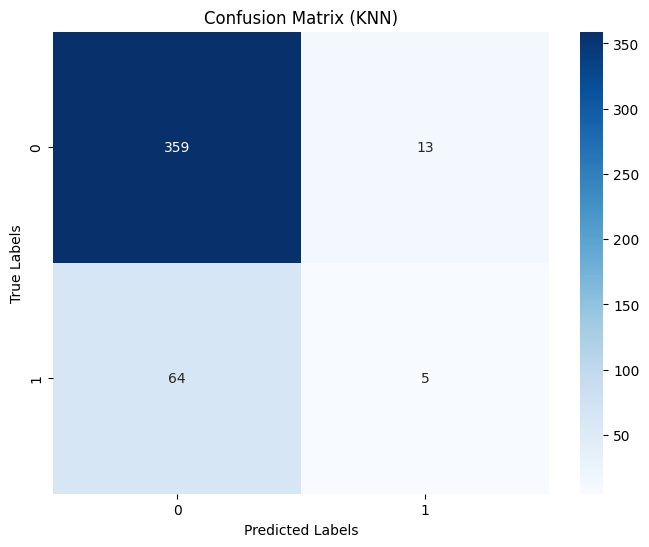

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (KNN)')
plt.show()


#DecisionTree

##entrainnement

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import pandas as pd
import numpy as np

# Préparation des données
df_numerique = df.select_dtypes(include=[np.number])
X = df_numerique.drop('response', axis=1)
Y = df_numerique['response']

# Bin the continuous target variable into discrete categories
#Y_binned = pd.cut(Y, bins=2, labels=[0, 1])

# Séparer les données en jeu d'entraînement et de test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_binned, test_size=0.2, random_state=11)

# Initialiser et entraîner le modèle Decision Tree
dt_model = DecisionTreeClassifier(random_state=50, max_depth=5)  # Vous pouvez ajuster les hyperparamètres comme max_depth
dt_model.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=5, random_state=50)

##prediction

In [ ]:

# Faire des prédictions
y_pred_dt = dt_model.predict(X_test)

# Évaluer les performances
accuracy_dt = accuracy_score(Y_test, y_pred_dt)
precision_dt = precision_score(Y_test, y_pred_dt, average='weighted')  # Weighted pour classes déséquilibrées
recall_dt = recall_score(Y_test, y_pred_dt, average='weighted')
f1_dt = f1_score(Y_test, y_pred_dt, average='weighted')


##visualisation

In [ ]:
# Afficher les résultats
print(f'Accuracy (Decision Tree): {accuracy_dt}')
print(f'Precision (Decision Tree): {precision_dt}')
print(f'Recall (Decision Tree): {recall_dt}')
print(f'F1-Score (Decision Tree): {f1_dt}')

# Matrice de confusion
conf_matrix_dt = confusion_matrix(Y_test, y_pred_dt)
print('Confusion Matrix (Decision Tree):\n', conf_matrix_dt)

# Rapport de classification détaillé
print('Classification Report (Decision Tree):\n', classification_report(Y_test, y_pred_dt))


Accuracy (Decision Tree): 0.8639455782312925
Precision (Decision Tree): 0.8439317756087942
Recall (Decision Tree): 0.8639455782312925
F1-Score (Decision Tree): 0.8378187152723684
Confusion Matrix (Decision Tree):
 [[363   9]
 [ 51  18]]
Classification Report (Decision Tree):
               precision    recall  f1-score   support

           0       0.88      0.98      0.92       372
           1       0.67      0.26      0.38        69

    accuracy                           0.86       441
   macro avg       0.77      0.62      0.65       441
weighted avg       0.84      0.86      0.84       441



##confusion

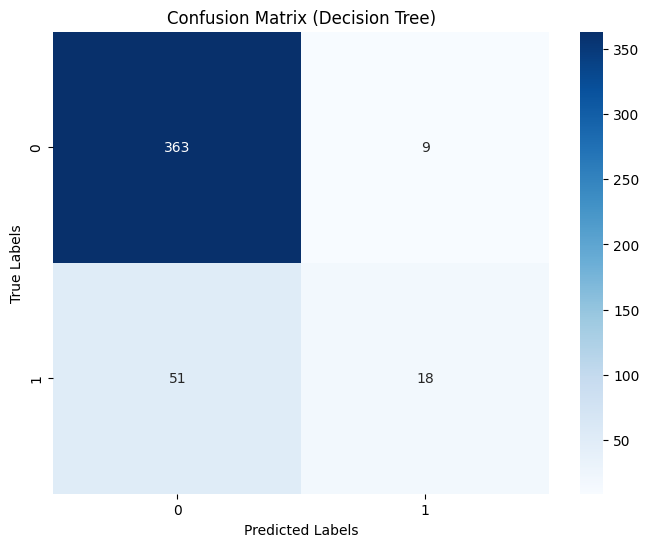

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Decision Tree)')
plt.show()


##feature importance

                Feature  Importance
19         acceptedcmp5    0.243614
5               recency    0.131965
17         acceptedcmp3    0.105828
20         acceptedcmp1    0.088979
16    numwebvisitsmonth    0.071242
14  numcatalogpurchases    0.066982
6              mntwines    0.059864
1            year_birth    0.045628
9       mntfishproducts    0.027740
12    numdealspurchases    0.022782
0                    id    0.020639
21         acceptedcmp2    0.019831
4              teenhome    0.018464
10     mntsweetproducts    0.018157
7             mntfruits    0.016783
15    numstorepurchases    0.016009
13      numwebpurchases    0.015983
2                income    0.009511
11         mntgoldprods    0.000000
8       mntmeatproducts    0.000000
18         acceptedcmp4    0.000000
3               kidhome    0.000000
22             complain    0.000000
23        z_costcontact    0.000000
24            z_revenue    0.000000


<ipython-input-292-29fbb69d6a93>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'], palette='viridis')


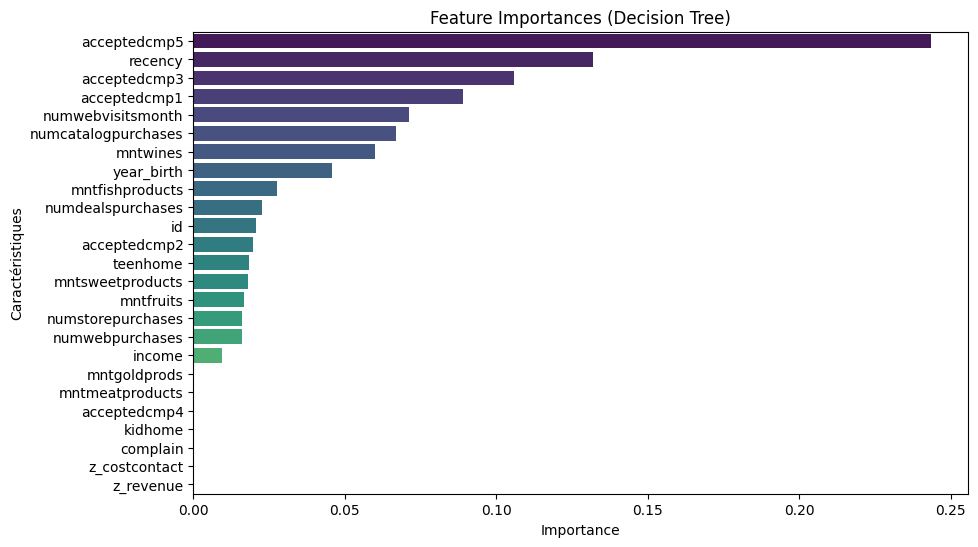

In [ ]:
# Importance des caractéristiques
importances = dt_model.feature_importances_
features = X.columns

# Créer un DataFrame pour lier les caractéristiques à leur importance
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})

# Trier par importance décroissante
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Afficher les caractéristiques triées
print(feature_importance_df)

# Visualiser avec un graphique
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'], palette='viridis')
plt.title('Feature Importances (Decision Tree)')
plt.xlabel('Importance')
plt.ylabel('Caractéristiques')
plt.show()


##decision tree visual

#GradientBoosting

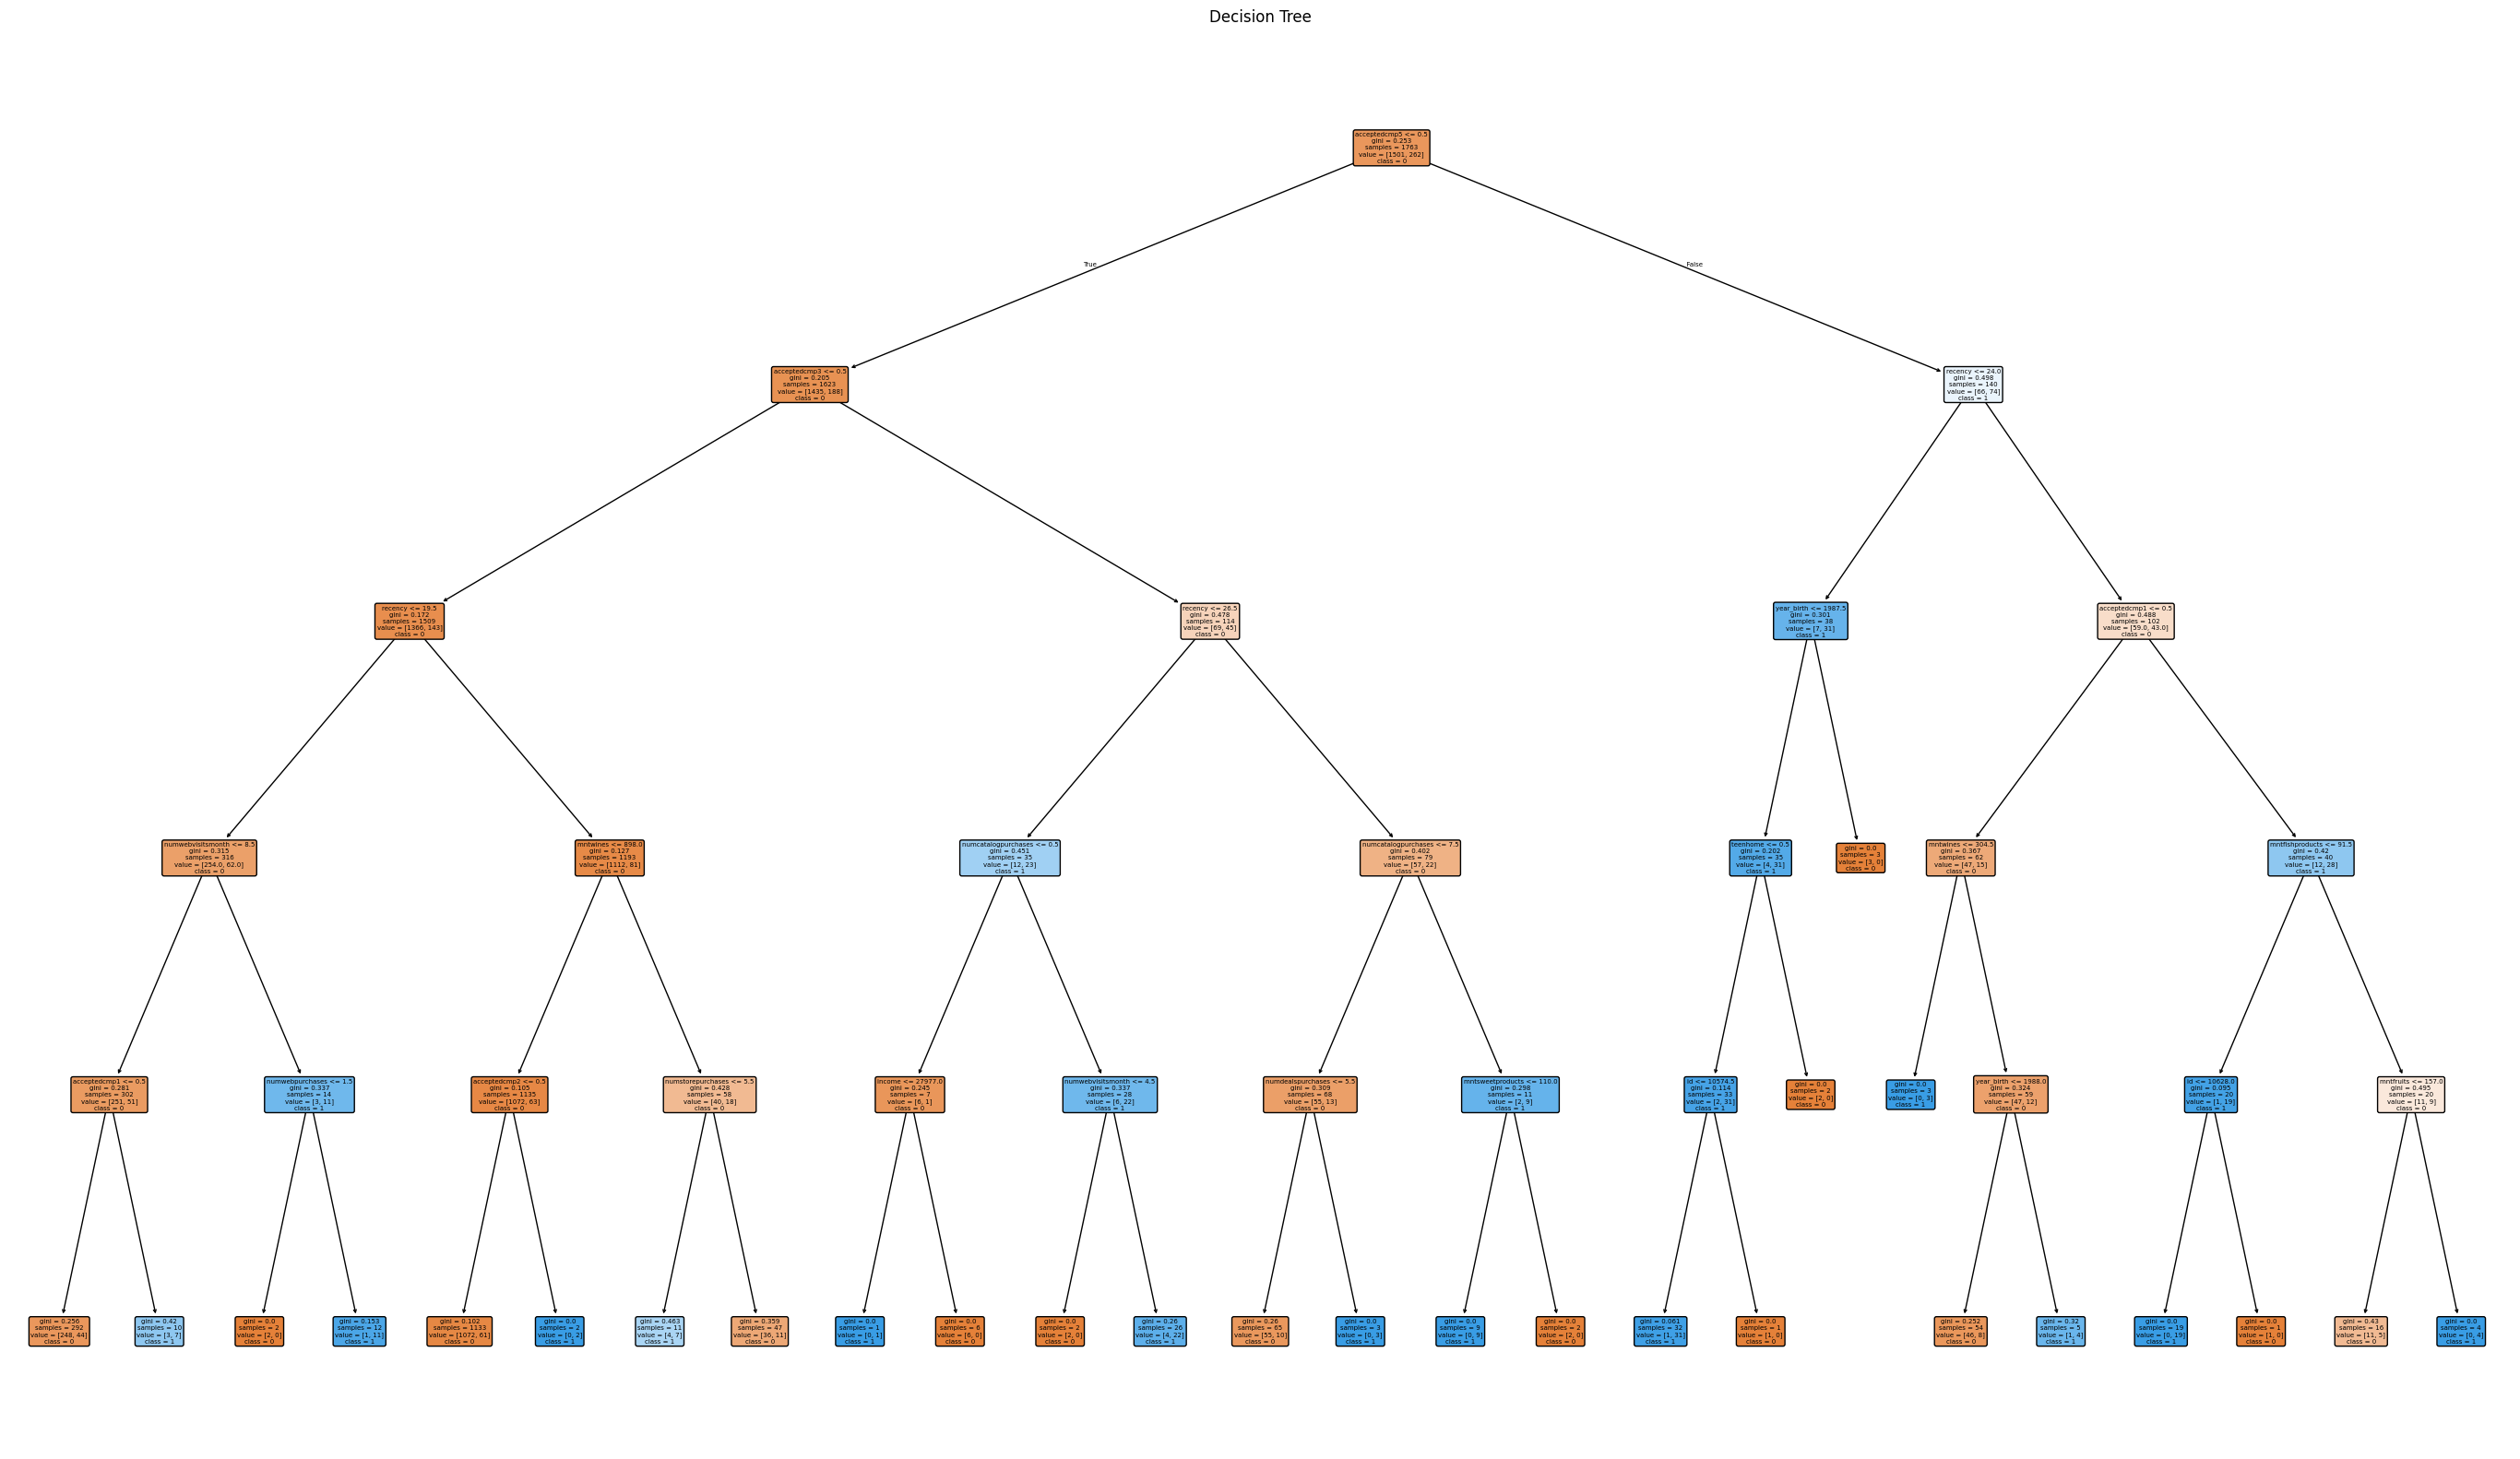

In [ ]:
from sklearn.tree import plot_tree

# Visualisation de l'arbre
plt.figure(figsize=(35, 20))
plot_tree(dt_model, feature_names=X.columns, class_names=['0', '1'], filled=True, rounded=True)
plt.title('Decision Tree')
plt.show()


##entrainnement

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


# Préparation des données
df_numerique = df.select_dtypes(include=[np.number])
X = df_numerique.drop('response', axis=1)  # Exclure la colonne cible
Y = df_numerique['response']  # Cible

# Bin the continuous target variable into discrete categories
#Y_binned = pd.cut(Y, bins=2, labels=[0, 1])

# Séparer les données en jeu d'entraînement et de test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_binned, test_size=0.2, random_state=42)

# Initialiser et entraîner le modèle de Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, Y_train)

GradientBoostingClassifier(random_state=42)

##prediction

In [ ]:

# Faire des prédictions
y_pred_gb = gb_model.predict(X_test)

# Évaluer les performances
accuracy_gb = accuracy_score(Y_test, y_pred_gb)
precision_gb = precision_score(Y_test, y_pred_gb, average='weighted')  # Weighted pour classes déséquilibrées
recall_gb = recall_score(Y_test, y_pred_gb, average='weighted')
f1_gb = f1_score(Y_test, y_pred_gb, average='weighted')

##visualisation

In [ ]:

# Afficher les résultats
print(f'Accuracy: {accuracy_gb}')
print(f'Precision: {precision_gb}')
print(f'Recall: {recall_gb}')
print(f'F1-Score: {f1_gb}')

# Matrice de confusion
conf_matrix_gb = confusion_matrix(Y_test, y_pred_gb)
print('Confusion Matrix:\n', conf_matrix_gb)

# Rapport de classification détaillé
print('Classification Report:\n', classification_report(Y_test, y_pred_gb))


Accuracy: 0.873015873015873
Precision: 0.8586825864053585
Recall: 0.873015873015873
F1-Score: 0.8558166878580314
Confusion Matrix:
 [[359  11]
 [ 45  26]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       370
           1       0.70      0.37      0.48        71

    accuracy                           0.87       441
   macro avg       0.80      0.67      0.70       441
weighted avg       0.86      0.87      0.86       441



##confusion

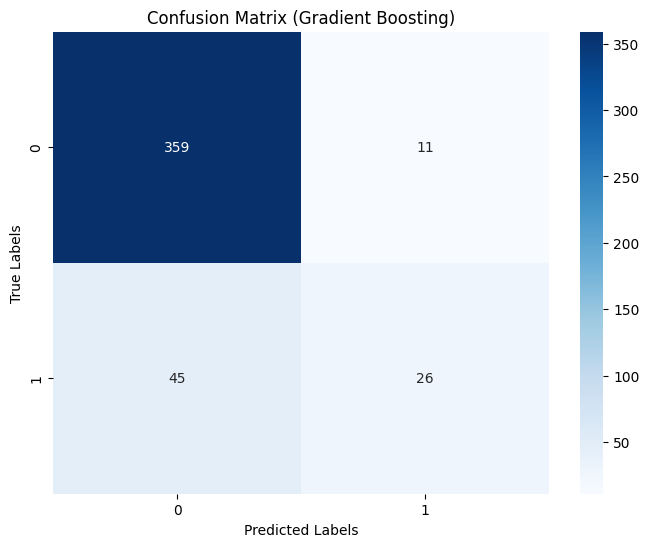

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gb, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Gradient Boosting)')
plt.show()


##feature importance

                Feature  Importance
5               recency    0.123841
19         acceptedcmp5    0.110976
17         acceptedcmp3    0.101879
8       mntmeatproducts    0.084469
2                income    0.079975
16    numwebvisitsmonth    0.072903
6              mntwines    0.070365
20         acceptedcmp1    0.069300
14  numcatalogpurchases    0.042057
15    numstorepurchases    0.040422
12    numdealspurchases    0.030326
1            year_birth    0.030165
0                    id    0.028453
13      numwebpurchases    0.022799
21         acceptedcmp2    0.015828
7             mntfruits    0.014855
9       mntfishproducts    0.013745
11         mntgoldprods    0.012459
4              teenhome    0.011944
10     mntsweetproducts    0.011855
18         acceptedcmp4    0.010634
22             complain    0.000746
3               kidhome    0.000005
23        z_costcontact    0.000000
24            z_revenue    0.000000


<ipython-input-298-3d71779295d2>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'], palette='viridis')


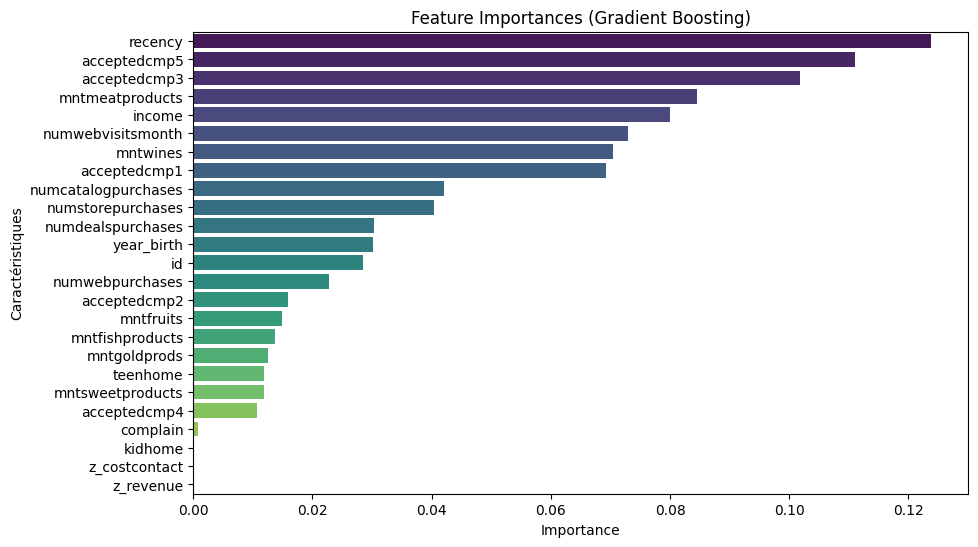

In [ ]:
# Importance des caractéristiques
importances = gb_model.feature_importances_
features = X.columns

# Créer un DataFrame pour lier les caractéristiques à leur importance
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})

# Trier par importance décroissante
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Afficher les caractéristiques triées
print(feature_importance_df)

# Visualiser les importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'], palette='viridis')
plt.title('Feature Importances (Gradient Boosting)')
plt.xlabel('Importance')
plt.ylabel('Caractéristiques')
plt.show()


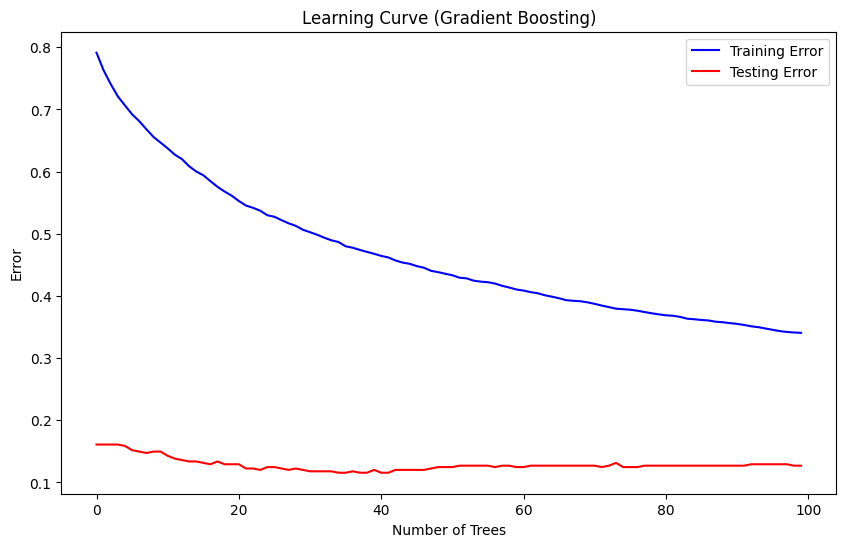

In [ ]:
# Récupérer les erreurs d'entraînement
train_errors = gb_model.train_score_

# Calculer les erreurs de test étape par étape
test_errors = []
for y_pred in gb_model.staged_predict(X_test):
    test_errors.append(1 - accuracy_score(Y_test, y_pred))

# Plot des erreurs
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(train_errors, label='Training Error', color='blue')
plt.plot(test_errors, label='Testing Error', color='red')
plt.title('Learning Curve (Gradient Boosting)')
plt.xlabel('Number of Trees')
plt.ylabel('Error')
plt.legend()
plt.show()


#comparaison

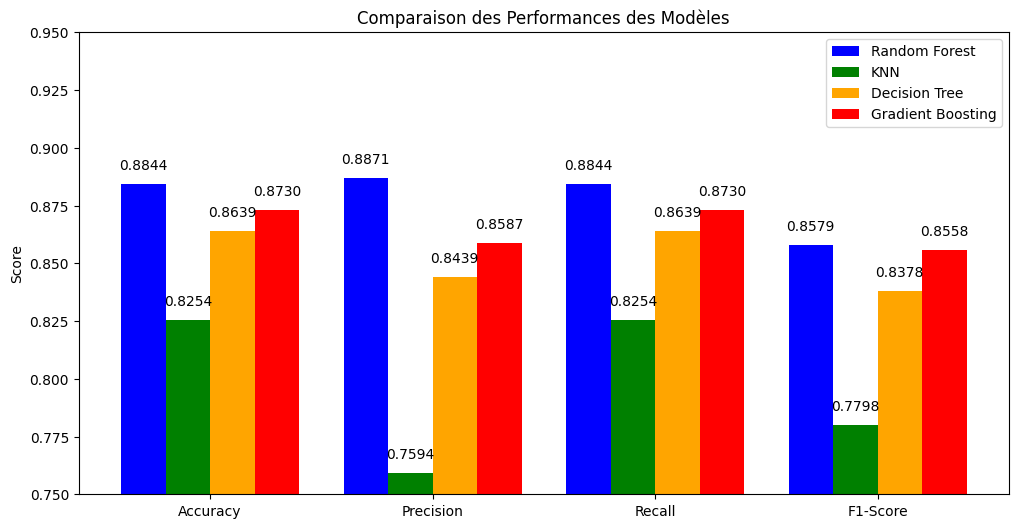

In [ ]:
import matplotlib.pyplot as plt

# Configurer la taille du graphique
plt.figure(figsize=(12, 6))

# Tracer les métriques pour chaque modèle
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
x = range(len(metrics))

# Ajouter les scores pour chaque modèle
bar_width = 0.2
bars_rf = plt.bar([i - 1.5 * bar_width for i in x], [accuracy_rf, precision_rf, recall_rf, f1_rf], width=bar_width, label="Random Forest", color='blue')
bars_knn = plt.bar([i - 0.5 * bar_width for i in x], [accuracy_knn, precision_knn, recall_knn, f1_knn], width=bar_width, label="KNN", color='green')
bars_dt = plt.bar([i + 0.5 * bar_width for i in x], [accuracy_dt, precision_dt, recall_dt, f1_dt], width=bar_width, label="Decision Tree", color='orange')
bars_gb = plt.bar([i + 1.5 * bar_width for i in x], [accuracy_gb, precision_gb, recall_gb, f1_gb], width=bar_width, label="Gradient Boosting", color='red')

# Ajouter les valeurs numériques au-dessus des barres
for bars in [bars_rf, bars_knn, bars_dt, bars_gb]:
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.005,
                 f'{bar.get_height():.4f}', ha='center', va='bottom', fontsize=10)

# Ajouter les légendes et titres
plt.xticks(x, metrics)
plt.ylim(0.75, 0.95)  # Limiter l'axe des ordonnées
plt.ylabel("Score")
plt.title("Comparaison des Performances des Modèles")
plt.legend()

# Afficher le graphique
plt.show()


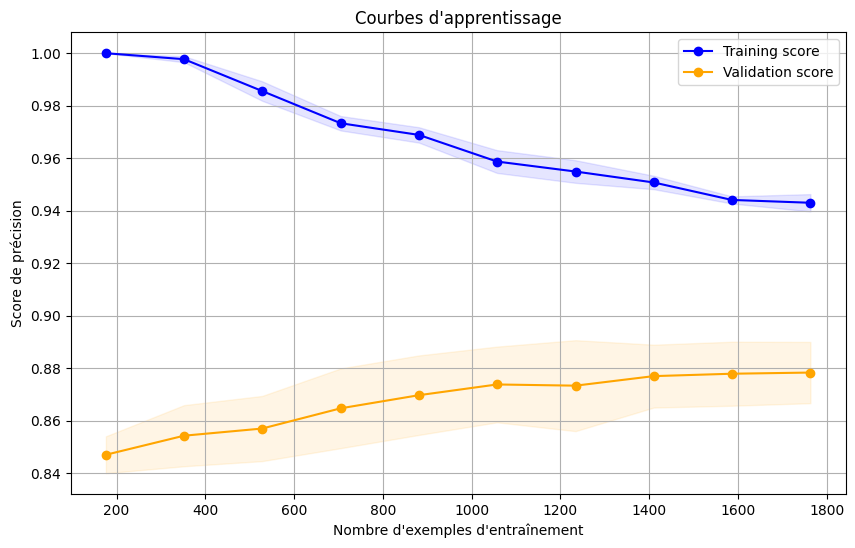

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Obtenir les scores d'entraînement et de validation
train_sizes, train_scores, val_scores = learning_curve(
    gb_model, X, Y_binned, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
)

# Moyenne et écart-type des scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Tracer les courbes
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Training score")
plt.plot(train_sizes, val_mean, 'o-', color="orange", label="Validation score")

# Ajouter des bandes d'erreur
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.1)
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color="orange", alpha=0.1)

# Labels et légendes
plt.title("Courbes d'apprentissage")
plt.xlabel("Nombre d'exemples d'entraînement")
plt.ylabel("Score de précision")
plt.legend(loc="best")
plt.grid()
plt.show()


#amelioration

##entrainnement



In [ ]:

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Modèle de base
model = RandomForestClassifier(random_state=50)

# Hyperparamètres à tester
param_grid = {
    'n_estimators': [75, 100, 150],
    'max_depth': [None],
    'min_samples_split': [10,20,30],
    'min_samples_leaf': [1,2,3]
}

# GridSearchCV pour rechercher les meilleurs hyperparamètres
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           scoring='accuracy', cv=5, verbose=2, n_jobs=-1)

# Entraînement avec les données d'entraînement (X_train, y_train)
grid_search.fit(X_train, Y_train)

# Affichage des meilleurs paramètres
print("Meilleurs paramètres :", grid_search.best_params_)

# Modèle avec les meilleurs paramètres
best_model = grid_search.best_estimator_


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Meilleurs paramètres : {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}


##prédiction

In [ ]:
# Prédictions sur les données de test (X_test)
y_pred = best_model.predict(X_test)


##visualisation

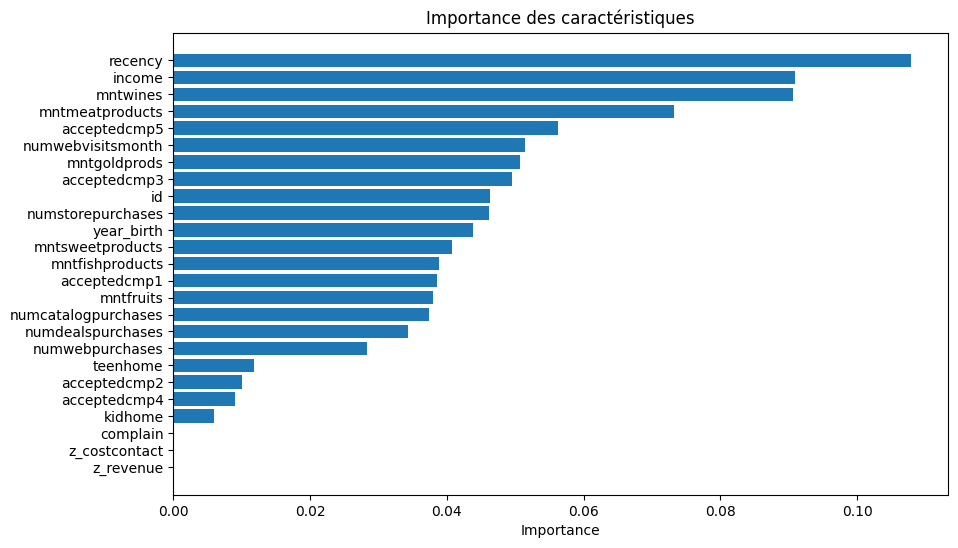

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Importance des caractéristiques
feature_importances = best_model.feature_importances_
features = X_train.columns  # Si X_train est un DataFrame

# Tri des caractéristiques par importance
indices = feature_importances.argsort()

# Tracer l'importance des caractéristiques
plt.figure(figsize=(10, 6))
plt.title("Importance des caractéristiques")
plt.barh(features[indices], feature_importances[indices], align="center")
plt.xlabel("Importance")
plt.show()


##confusion

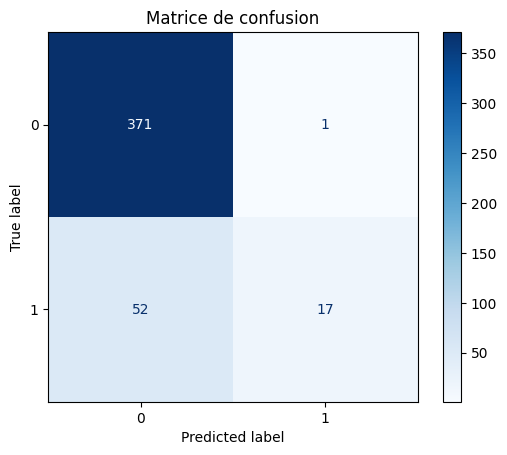

Accuracy: 0.7959183673469388
Precision: 0.7500013652771785
Recall: 0.7959183673469388
F1-Score: 0.7693214613213502
              precision    recall  f1-score   support

           0       0.88      1.00      0.93       372
           1       0.94      0.25      0.39        69

    accuracy                           0.88       441
   macro avg       0.91      0.62      0.66       441
weighted avg       0.89      0.88      0.85       441



In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calcul de la matrice de confusion
cm = confusion_matrix(Y_test, y_pred)

# Affichage de la matrice de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues')
plt.title("Matrice de confusion")
plt.show()

from sklearn.metrics import classification_report
# Faire des prédictions


# Évaluer les performances
accuracy_gb = accuracy_score(Y_test, y_pred_gb)
precision_gb = precision_score(Y_test, y_pred_gb, average='weighted')  # Weighted pour classes déséquilibrées
recall_gb = recall_score(Y_test, y_pred_gb, average='weighted')
f1_gb = f1_score(Y_test, y_pred_gb, average='weighted')


# Afficher les résultats
print(f'Accuracy: {accuracy_gb}')
print(f'Precision: {precision_gb}')
print(f'Recall: {recall_gb}')
print(f'F1-Score: {f1_gb}')
# Rapport de classification (précision, rappel, F1-score)
print(classification_report(Y_test, y_pred))
